In [6]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import cv2

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

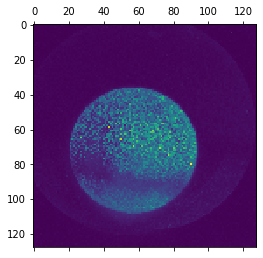

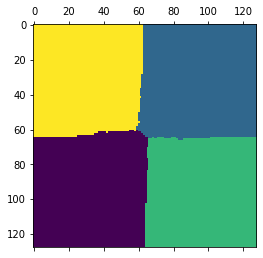

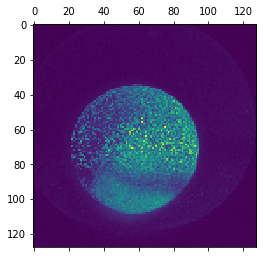

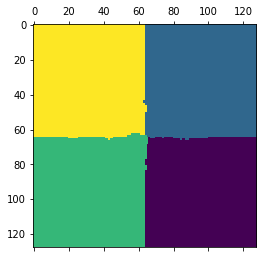

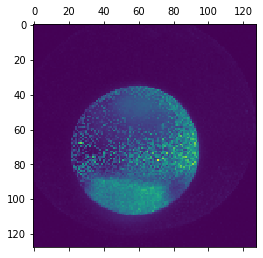

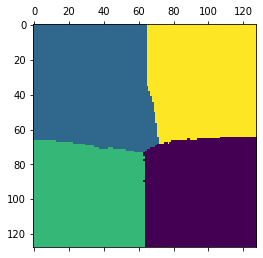

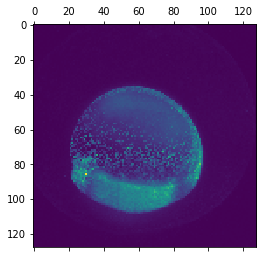

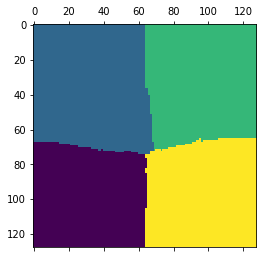

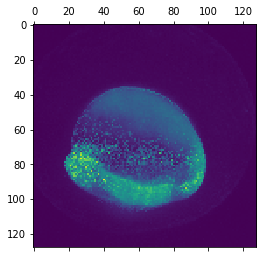

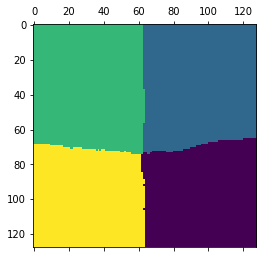

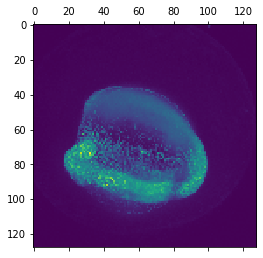

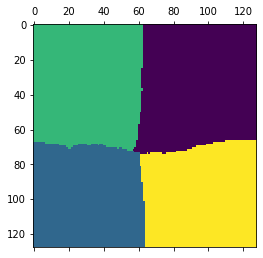

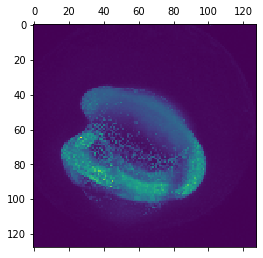

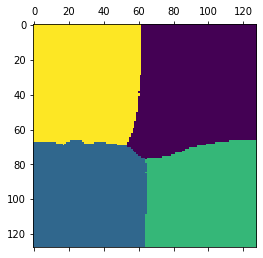

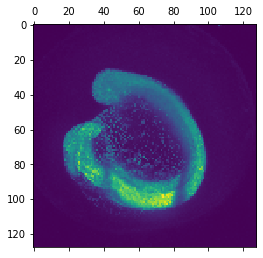

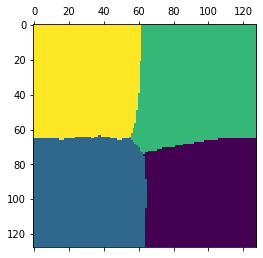

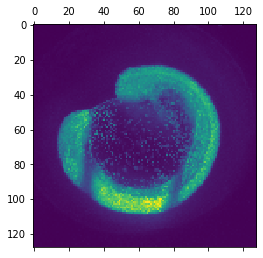

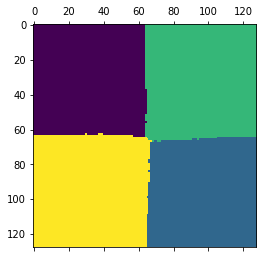

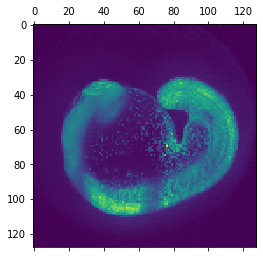

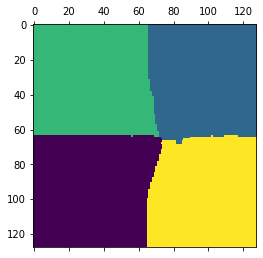

In [8]:
stack = imageio.mimread('embryo.tif')
np_stack = np.asarray(stack)

for i in range(len(np_stack)):
    # We use a mask that limits to the foreground: the problem that we are
    # interested in here is not separating the objects from the background,
    # but separating them one from the other.
    img = np_stack[i]
    img = cv2.resize(img, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
    mask = img.astype(bool)

    img = img.astype(float)
    img += 1 + 0.2 * np.random.randn(*img.shape)
    # Convert the image into a graph with the value of the gradient on the
    # edges.
    graph = image.img_to_graph(img, mask=mask)

    # Take a decreasing function of the gradient: we take it weakly
    # dependent from the gradient the segmentation is close to a voronoi
    graph.data = np.exp(-graph.data / graph.data.std())
    # Force the solver to be arpack, since amg is numerically
    # unstable on this example
    labels = spectral_clustering(graph, n_clusters=4, eigen_solver="amg")
    label_im = np.full(mask.shape, -1.0)
    label_im[mask] = labels

    plt.matshow(img)
    plt.matshow(label_im)